In [2]:
import sys
sys.path.append('.')

In [3]:
import os
import glob
import json

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
with open('config.json', 'r') as f:
    config = json.load(f) 

input_folder_path = config['input_folder_path']
output_folder_path = config['output_folder_path']

In [6]:
ingested_f = open(os.path.join(output_folder_path, 'ingestedfiles.txt'), 'w')

full_df = pd.DataFrame()
for csv_f in glob.glob(pathname='practicedata/*.csv'):
    df = pd.read_csv(csv_f)
    full_df = pd.concat([full_df, df], axis=0, ignore_index=True)
    ingested_f.write(f'{csv_f}\n')
    
ingested_f.close()

full_df = full_df.drop_duplicates(ignore_index=True)
full_df.to_csv(os.path.join(output_folder_path, 'finaldata.csv'), index=False)

In [7]:
full_df

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,nciw,100,1359,1,0
1,lsid,68,282,14,0
2,pwls,71,949,40,1
3,bqlx,686,3782,103,0
4,zmei,45,655,7,0
5,wosl,0,18,21,1
6,xcvb,189,961,18,1
7,dfgh,16,1028,33,0
8,ngrd,9,45,1,1
9,xful,0,67,14,1


In [ ]:
keep_cols = [
    'lastmonth_activity',
    'lastyear_activity',
    'number_of_employees'
]

In [ ]:
full_df[keep_cols]

In [ ]:
df = pd.read_csv(os.path.join(config['output_folder_path'], 'finaldata.csv'))

In [ ]:
from training import process_data

In [ ]:
X_full, y_full = process_data(df, label='exited')

In [ ]:
X_full.dtypes

In [ ]:
y_full.unique()

In [ ]:
y_full.dtypes

In [ ]:
X_full.describe()

In [ ]:
full_df.describe()

In [26]:
import numpy as np

In [30]:
full_df.describe(include=np.number).loc[['std', 'mean', '50%']]

,lastmonth_activity,lastyear_activity,number_of_employees,exited
std,284.033229,2192.644958,31.353886,0.503831
mean,165.653846,1502.923077,26.884615,0.576923
50%,73.000000,955.000000,14.000000,1.000000


In [ ]:
full_df.info()

In [ ]:
full_df.shape

In [8]:
test_data_df = pd.read_csv('testdata/testdata.csv')

In [10]:
test_data_df

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,werf,234,3,10,1
1,sdfv,14,2145,99,0
2,edcv,34,333,1000,0
3,uhgr,101,12346,2,1
4,okjh,0,675,25,1


In [16]:
test_data_df.loc[1, 'exited'] = None

In [17]:
test_data_df

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,werf,234,3,10,1.0
1,sdfv,14,2145,99,NaN
2,edcv,34,333,1000,0.0
3,uhgr,101,12346,2,1.0
4,okjh,0,675,25,1.0


In [31]:
test_data_df.isna().sum()/test_data_df.shape[1]

corporation            0.0
lastmonth_activity     0.0
lastyear_activity      0.0
number_of_employees    0.0
exited                 0.2
dtype: float64

In [50]:
# https://stackoverflow.com/questions/58648739/how-to-check-if-python-package-is-latest-version-programmatically
import subprocess
import sys
def check_versions(name):
    latest_version = str(subprocess.run([sys.executable, '-m', 'pip', 'install', '{}==random'.format(name)], capture_output=True, text=True))
    latest_version = latest_version[latest_version.find('(from versions:')+15:]
    latest_version = latest_version[:latest_version.find(')')]
    latest_version = latest_version.replace(' ','').split(',')[-1]


    current_version = str(subprocess.run([sys.executable, '-m', 'pip', 'show', '{}'.format(name)], capture_output=True, text=True))
    version_pos = current_version.find('Version:')
    if version_pos > 0:
        current_version = current_version[version_pos+8:]
        current_version = current_version[:current_version.find('\\n')].replace(' ','') 
    else:
        current_version = 'not_installed'

    return [current_version, latest_version]

In [47]:
check('sklearn')

['not installed', '0.0']

In [48]:
count = 0
with open('requirements.txt', 'rt') as f:
    for line in f:
        package_name = line[:line.find('==')]
        cv, lv = check_versions(package_name)
        print(f'{package_name}\t{cv}\t{lv}')
        count += 1

click	7.1.2	8.1.3
cycler	0.10.0	0.11.0
Flask	1.1.2	2.2.2
gunicorn	20.0.4	20.1.0
itsdangerous	1.1.0	2.1.2
Jinja2	2.11.3	3.1.2
joblib	1.0.1	1.1.0
kiwisolver	1.3.1	1.4.4
MarkupSafe	1.1.1	2.1.1
matplotlib	3.3.4	3.6.0rc1
numpy	1.20.1	1.23.2
pandas	1.2.2	1.4.3
Pillow	8.1.0	9.2.0
pyparsing	2.4.7	3.0.9
python-dateutil	2.8.1	2.8.2
pytz	2021.1	2022.2.1
scikit-learn	0.24.1	1.1.2
scipy	1.6.1	1.9.0
seaborn	0.11.1	0.12.0rc0
six	1.15.0	1.16.0
sklearn	not installed	0.0
threadpoolctl	2.1.0	3.1.0
Werkzeug	1.0.1	2.2.2


In [42]:
current_version = str(subprocess.run([sys.executable, '-m', 'pip', 'show', '{}'.format('sklearn')], capture_output=True, text=True))

In [43]:
current_version

"CompletedProcess(args=['/opt/homebrew/Caskroom/miniforge/base/envs/mldevops-c4/bin/python', '-m', 'pip', 'show', 'sklearn'], returncode=1, stdout='', stderr='WARNING: Package(s) not found: sklearn\\n')"

In [44]:
current_version.find('Version:')

-1

In [51]:
with open('requirements.txt', 'rt') as fin, open('package_versions.txt', 'wt') as fout:
    for line in fin:
        package_name = line[:line.find('==')]
        cv, lv = check_versions(package_name)
        fout.write(f'{package_name}\t\t{cv}\t{lv}\n')

In [83]:
def model_predictions(X_test):

    clf = joblib.load(os.path.join(config['output_folder_path'], 'trainedmodel.pkl'))
    preds = clf.predict(X_test)

    return preds

In [80]:
df = pd.read_csv(os.path.join(config['output_folder_path'], 'finaldata.csv'))
X_test, y_test = process_data(df, label='exited')

In [55]:
from training import process_data

In [58]:
import joblib

In [84]:
preds= model_predictions(X_test)

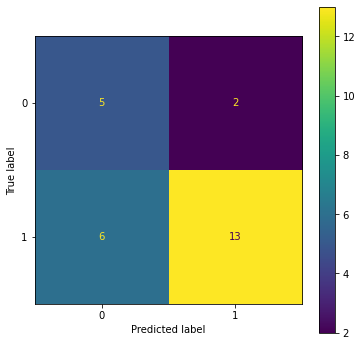

In [79]:
cm = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
plt.savefig('cm.png')

In [87]:
print(f'{10.1234:.2f}')

10.12


In [88]:
import subprocess

In [94]:
subprocess.run(['curl', '127.0.0.1:8000/scoring'], capture_output=True).stdout.decode()

'0.76'

In [97]:
response3 = subprocess.run(['curl', '-X', 'POST', '127.0.0.1:8000/prediction?filename=testdata/testdata.csv'],
                           capture_output=True).stdout.decode()

In [98]:
response3

'[0 1 1 1 1]'

In [99]:
subprocess.run(['curl', '127.0.0.1:8000/diagnostics'], capture_output=True).stdout.decode()

'<pre>Ingestion time: 4.30</pre><br><pre>Training time: 5.67<br><pre>Missing values: corporation            0.0\nlastmonth_activity     0.0\nlastyear_activity      0.0\nnumber_of_employees    0.0\nexited                 0.0\ndtype: float64</pre><br><pre>click\t\t7.1.2\t8.1.3\ncycler\t\t0.10.0\t0.11.0\nFlask\t\t1.1.2\t2.2.2\ngunicorn\t\t20.0.4\t20.1.0\nitsdangerous\t\t1.1.0\t2.1.2\nJinja2\t\t2.11.3\t3.1.2\njoblib\t\t1.0.1\t1.1.0\nkiwisolver\t\t1.3.1\t1.4.4\nMarkupSafe\t\t1.1.1\t2.1.1\nmatplotlib\t\t3.3.4\t3.6.0rc1\nnumpy\t\t1.20.1\t1.23.2\npandas\t\t1.2.2\t1.4.3\nPillow\t\t8.1.0\t9.2.0\npyparsing\t\t2.4.7\t3.0.9\npython-dateutil\t\t2.8.1\t2.8.2\npytz\t\t2021.1\t2022.2.1\nscikit-learn\t\t0.24.1\t1.1.2\nscipy\t\t1.6.1\t1.9.0\nseaborn\t\t0.11.1\t0.12.0rc0\nsix\t\t1.15.0\t1.16.0\nsklearn\t\tnot_installed\t0.0\nthreadpoolctl\t\t2.1.0\t3.1.0\nWerkzeug\t\t1.0.1\t2.2.2\n</pre>'

In [115]:
from fullprocess import new_input_found

ImportError: cannot import name 'new_input_found' from 'fullprocess' (/Users/irina/Library/Mobile Documents/com~apple~CloudDocs/Workspace/mldevops-c4/fullprocess.py)

In [110]:
new_input_check('practicedata/dataset2.csv')

True

In [120]:
with open('production_deployment/latestscore.txt') as f:
    score = float(f.readline())
    print(f'{score:.5f}')

0.76470


In [ ]:
glob.glob(pathname=os.path.join('sourcedata', '*.csv'))